*Entendimento do Negócio*

**Processo de Obtenção de Empréstimos**

Para entender melhor o contexto dos dados que estamos analisando, vamos detalhar como o processo de obtenção de empréstimos públicos funciona no Brasil:

Solicitação do Empréstimo:

1. Estados e municípios, ou suas entidades, identificam uma necessidade de financiamento e solicitam um empréstimo. Esta solicitação é feita com base em projetos específicos que precisam ser financiados.
Regulamentação e Normas:

2. A contratação de operações de crédito por esses entes deve obedecer às normas estabelecidas pela Lei de Responsabilidade Fiscal (LRF) e pelas Resoluções do Senado Federal 40/2001 e 43/2001. Essas normas visam garantir que os empréstimos sejam realizados de forma responsável, sem comprometer a sustentabilidade fiscal dos entes públicos.
Verificação de Limites e Condições (PVL):

3. Antes de contratar um empréstimo, os estados e municípios precisam submeter um Pedido de Verificação de Limites e Condições (PVL) à Secretaria do Tesouro Nacional (STN) ou à instituição financeira credora. Esse processo verifica se o empréstimo está dentro dos limites legais e das condições financeiras estabelecidas.
Aprovação e Liberação:

4. Após a análise, se tudo estiver conforme as normas, o empréstimo é aprovado e os recursos são liberados. Este processo envolve várias etapas de análise e aprovação para garantir que o empréstimo seja viável e sustentável.

*Entendimento dos dados*

Esses dados são informações sobre empréstimos e financiamentos que estados, municípios e o Distrito Federal do Brasil estão buscando. Vamos entender cada parte:

* **Interessado**: Quem está pedindo o empréstimo (por exemplo, um município).
* **UF**: A sigla do estado (por exemplo, MG para Minas Gerais).
* **Tipo de Interessado**: Se é um município ou um estado.
* **Tipo de Operação**: Tipo de empréstimo (por exemplo, empréstimo interno).
* **Finalidade**: Para que o dinheiro será usado (por exemplo, para projetos em várias áreas).
* **Tipo de Credor**: O tipo de instituição que está emprestando o dinheiro (por exemplo, um banco).
* **Credor**: O nome do banco ou instituição financeira.
* **Moeda**: Em que moeda o empréstimo foi feito (por exemplo, Reais).
* **Valor**: Quanto dinheiro está sendo pedido.
* **Número do Processo/PVL**: Um número único que identifica o pedido.
* **Código IBGE**: Um número que identifica oficialmente o município ou estado.
* **Status**: A situação do pedido (por exemplo, se foi aprovado).
* **Data**: Quando o status foi atualizado.
* **Analisado**: Quem analisou o pedido (por exemplo, um banco ou órgão do governo).

In [50]:
# Frameworks
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Ajustes casas decimais no pandas e Layout
pd.options.display.float_format = '{:,.2f}'.format
sns.set_theme( style='whitegrid')

In [52]:
# Ler os dados
Base_Credito = pd.read_csv('data/Base_Dados - Operacoes Uniao.csv', encoding='latin1', sep=';')


In [53]:
# Informações
Base_Credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25891 entries, 0 to 25890
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Interessado             25891 non-null  object 
 1   UF                      25891 non-null  object 
 2   Tipo de interessado     25891 non-null  object 
 3   Tipo de operação        25891 non-null  object 
 4   Finalidade              25891 non-null  object 
 5   Tipo de credor          25891 non-null  object 
 6   Credor                  25891 non-null  object 
 7   Moeda                   25891 non-null  object 
 8   Valor                   25891 non-null  object 
 9   Número do Processo/PVL  25891 non-null  object 
 10  Código IBGE             25876 non-null  float64
 11  Status                  25891 non-null  object 
 12  Data                    25891 non-null  object 
 13  Analisado por           25891 non-null  object 
dtypes: float64(1), object(13)
memory usage

In [54]:
Base_Credito.columns

Index(['Interessado', 'UF', 'Tipo de interessado', 'Tipo de operação',
       'Finalidade', 'Tipo de credor', 'Credor', 'Moeda', 'Valor',
       'Número do Processo/PVL', 'Código IBGE', 'Status', 'Data',
       'Analisado por'],
      dtype='object')

In [55]:
# Renomear
Base_Credito.columns = [ Loop.replace(' ', '_') for Loop in Base_Credito.columns ]
Base_Credito.columns

Index(['Interessado', 'UF', 'Tipo_de_interessado', 'Tipo_de_operação',
       'Finalidade', 'Tipo_de_credor', 'Credor', 'Moeda', 'Valor',
       'Número_do_Processo/PVL', 'Código_IBGE', 'Status', 'Data',
       'Analisado_por'],
      dtype='object')

In [56]:
# Tipos dos campos
Base_Credito.dtypes

Interessado                object
UF                         object
Tipo_de_interessado        object
Tipo_de_operação           object
Finalidade                 object
Tipo_de_credor             object
Credor                     object
Moeda                      object
Valor                      object
Número_do_Processo/PVL     object
Código_IBGE               float64
Status                     object
Data                       object
Analisado_por              object
dtype: object

In [57]:
# Transformação retirando .
Base_Credito.Valor = Base_Credito.Valor.apply( lambda Loop : Loop.replace('.', '') )
Base_Credito.Valor = Base_Credito.Valor.apply( lambda Loop : Loop.replace(',', '.') )
Base_Credito.Valor = pd.to_numeric( Base_Credito.Valor )

Base_Credito.Valor.head()

0     300,000.00
1     172,700.00
2     300,000.00
3     187,200.00
4   1,000,000.00
Name: Valor, dtype: float64

In [58]:
# Transformar data
Base_Credito.Data = pd.to_datetime( Base_Credito.Data )

Base_Credito.head()

,Interessado,UF,Tipo_de_interessado,Tipo_de_operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Número_do_Processo/PVL,Código_IBGE,Status,Data,Analisado_por
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",00000.000000/0021-94,"3,100,104.00",Devolvido,2009-08-19,STN
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172,700.00",17944.000104/2008-22,"3,100,104.00",Arquivado,2008-04-17,STN
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN


In [59]:
# Campos unicos
Base_Credito.nunique()

Interessado                3948
UF                           27
Tipo_de_interessado           3
Tipo_de_operação              6
Finalidade                   82
Tipo_de_credor                7
Credor                      137
Moeda                         5
Valor                      7479
Número_do_Processo/PVL    25891
Código_IBGE                4079
Status                       28
Data                       4096
Analisado_por                 2
dtype: int64

In [60]:
# Enriquecimento

# Dicionario De Para
uf_to_regiao = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AM': 'Norte',
    'AP': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MG': 'Sudeste',
    'MS': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'PR': 'Sul',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RO': 'Norte',
    'RR': 'Norte',
    'RS': 'Sul',
    'SC': 'Sul',
    'SE': 'Nordeste',
    'SP': 'Sudeste',
    'TO': 'Norte'
}

Base_Credito['Região'] = Base_Credito.UF.map( uf_to_regiao  )
Base_Credito.head()

,Interessado,UF,Tipo_de_interessado,Tipo_de_operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Número_do_Processo/PVL,Código_IBGE,Status,Data,Analisado_por,Região
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",00000.000000/0021-94,"3,100,104.00",Devolvido,2009-08-19,STN,Sudeste
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172,700.00",17944.000104/2008-22,"3,100,104.00",Arquivado,2008-04-17,STN,Sudeste
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN,Sudeste


In [61]:
# Gerando datas
Base_Credito['Ano'] = Base_Credito.Data.dt.year
Base_Credito['Mes'] = Base_Credito.Data.dt.month
Base_Credito['Dia'] = Base_Credito.Data.dt.day
Base_Credito.head()

,Interessado,UF,Tipo_de_interessado,Tipo_de_operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Número_do_Processo/PVL,Código_IBGE,Status,Data,Analisado_por,Região,Ano,Mes,Dia
0,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",00000.000000/0021-94,"3,100,104.00",Devolvido,2009-08-19,STN,Sudeste,2009,8,19
1,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"172,700.00",17944.000104/2008-22,"3,100,104.00",Arquivado,2008-04-17,STN,Sudeste,2008,4,17
2,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Provias 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"300,000.00",17944.000953/2009-67,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste,2009,11,20
3,Abadia dos Dourados,MG,Município,Operação Contratual Interna,Caminho da Escola 2009 A,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"187,200.00",17944.001037/2009-44,"3,100,104.00",Deferido,2009-11-20,STN,Sudeste,2009,11,20
4,Abadia dos Dourados,MG,Município,Operação Contratual Interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco de Desenvolvimento de Minas Gerais S/A,Real,"1,000,000.00",17944.001324/2013-31,"3,100,104.00",Deferido,2013-11-06,STN,Sudeste,2013,11,6


In [62]:
# Concentração por UF
Base_Credito.UF.value_counts( normalize=True )

UF
MG   0.19
PR   0.18
RS   0.15
SP   0.13
SC   0.12
BA   0.05
GO   0.02
CE   0.02
MT   0.02
RJ   0.01
PE   0.01
MS   0.01
ES   0.01
PI   0.01
TO   0.01
PA   0.01
RO   0.01
MA   0.01
RN   0.01
PB   0.01
SE   0.01
AL   0.00
AM   0.00
AC   0.00
DF   0.00
RR   0.00
AP   0.00
Name: proportion, dtype: float64

In [63]:
# Distribuição por Região
Base_Credito.Região.value_counts( normalize=True )

Região
Sul            0.45
Sudeste        0.35
Nordeste       0.12
Centro-Oeste   0.06
Norte          0.03
Name: proportion, dtype: float64

In [64]:
# Interessado
Base_Credito.Tipo_de_interessado.value_counts()

Tipo_de_interessado
Município          24697
Estado              1179
Empresa Estatal       15
Name: count, dtype: int64

In [65]:
Base_Credito.loc[ Base_Credito.Tipo_de_interessado == 'Empresa Estatal' ]

,Interessado,UF,Tipo_de_interessado,Tipo_de_operação,Finalidade,Tipo_de_credor,Credor,Moeda,Valor,Número_do_Processo/PVL,Código_IBGE,Status,Data,Analisado_por,Região,Ano,Mes,Dia
5986,Companhia Catarinense de Águas e Saneamento,SC,Empresa Estatal,Operação Contratual Externa (com garantia da U...,Preservação e recuperação ambiental,Instituição Financeira Internacional,Japan International Cooperation Agency,Iene,"14,426,000,000.00",17944.000215/2009-10,NaN,Encaminhado à PGFN com manifestação técnica fa...,2010-03-03,STN,Sul,2010,3,3
5987,Companhia Catarinense de Águas e Saneamento,SC,Empresa Estatal,Operação Contratual Externa,Fortalecimento Institucional,Instituição Financeira Internacional,Agência Francesa de Desenvolvimento,Euro,"99,756,455.08",17944.000681/2013-81,NaN,Deferido,2013-08-30,STN,Sul,2013,8,30
5988,Companhia Catarinense de Águas e Saneamento,SC,Empresa Estatal,Operação Contratual Externa,Fortalecimento Institucional,Instituição Financeira Internacional,International Finance Corporation,Real,"40,000,000.00",17944.001658/2010-61,NaN,Deferido,2011-06-27,STN,Sul,2011,6,27
5989,Companhia CELG de Participações,GO,Empresa Estatal,Operação Contratual Interna (com garantia da U...,Fortalecimento Institucional,Instituição Financeira Nacional,Caixa Econômica Federal,Real,"1,900,000,000.00",17944.000956/2014-68,NaN,Encaminhado à PGFN com manifestação técnica fa...,2014-09-01,STN,Centro-Oeste,2014,9,1
5990,Companhia de Saneamento Ambiental do Distrito ...,DF,Empresa Estatal,Operação Contratual Externa (com garantia da U...,Preservação e recuperação ambiental,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar dos EUA,"170,840,000.00",17944.001381/2013-10,NaN,Encaminhado à PGFN com manifestação técnica fa...,2014-07-16,STN,Centro-Oeste,2014,7,16
5991,Companhia de Saneamento Básico do Estado de Sã...,SP,Empresa Estatal,Operação Contratual Externa (com garantia da U...,Infraestrutura,Instituição Financeira Internacional,Japan International Cooperation Agency,Iene,"33,584,000,000.00",17944.000023/2011-28,NaN,Encaminhado à PGFN com manifestação técnica fa...,2011-12-08,STN,Sudeste,2011,12,8
5992,Companhia de Saneamento Básico do Estado de Sã...,SP,Empresa Estatal,Operação Contratual Externa (com garantia da U...,Preservação e recuperação ambiental,Instituição Financeira Internacional,Banco Interamericano de Desenvolvimento,Dólar dos EUA,"600,000,000.00",17944.000630/2009-73,NaN,Encaminhado à PGFN com manifestação técnica fa...,2010-04-16,STN,Sudeste,2010,4,16
5993,Companhia de Saneamento Básico do Estado de Sã...,SP,Empresa Estatal,Operação Contratual Externa (com garantia da U...,Preservação e recuperação ambiental,Instituição Financeira Internacional,Japan International Cooperation Agency,Iene,"6,208,000,000.00",17944.000631/2009-18,NaN,Encaminhado à PGFN com manifestação técnica fa...,2010-06-24,STN,Sudeste,2010,6,24
5994,Companhia de Saneamento Básico do Estado de Sã...,SP,Empresa Estatal,Operação Contratual Externa (com garantia da U...,Preservação e recuperação ambiental,Instituição Financeira Internacional,Japan International Cooperation Agency,Iene,"19,169,000,000.00",17944.001168/2010-65,NaN,Encaminhado à PGFN com manifestação técnica fa...,2010-12-09,STN,Sudeste,2010,12,9
5995,Companhia de Saneamento de Minas Gerais,MG,Empresa Estatal,Operação Contratual Externa (com garantia da U...,Preservação e recuperação ambiental,Instituição Financeira Internacional,Kreditanstalt für Wiederaufbau,Euro,"100,000,000.00",17944.001098/2010-45,NaN,Encaminhado à PGFN com manifestação técnica fa...,2011-09-01,STN,Sudeste,2011,9,1


In [66]:
Base_Credito.Tipo_de_operação.value_counts()

Tipo_de_operação
Operação Contratual Interna                            24168
Operação Contratual Interna (com garantia da União)     1048
Operação Contratual Externa (com garantia da União)      598
Concessão de garantia                                     68
Operação Contratual Externa                                8
Emissão de Títulos Públicos                                1
Name: count, dtype: int64

1. **Operação Contratual Interna**:  
   Trata-se de operações de crédito contratadas por entes da federação (como estados, municípios ou o próprio governo federal) com instituições financeiras nacionais. Essas operações podem financiar projetos de infraestrutura, programas sociais ou outras necessidades orçamentárias.
   
2. **Operação Contratual Interna (com garantia da União)**:  
   Essas são operações de crédito internas, ou seja, contratadas dentro do país, nas quais a União fornece uma garantia para a operação. Isso significa que, caso o ente contratante (estado ou município) não consiga honrar os compromissos, a União garante o pagamento.
   
3. **Operação Contratual Externa (com garantia da União)**:  
   Trata-se de operações de crédito contratadas por entes da federação (estados ou municípios) com instituições financeiras internacionais, mas com a garantia da União. Esse tipo de operação geralmente está ligado a financiamentos com organismos multilaterais, como o Banco Mundial ou o BID (Banco Interamericano de Desenvolvimento).
   
4. **Concessão de Garantia**:  
   A União, neste caso, concede uma garantia para a operação de crédito realizada por estados ou municípios, tanto em operações internas quanto externas. A concessão de garantia pela União é um compromisso de honrar o pagamento da dívida caso o devedor principal (ente federativo) não consiga pagá-la.
   
5. **Operação Contratual Externa**:  
   São operações de crédito contratadas por estados ou municípios diretamente com credores internacionais, sem a garantia da União. Essas operações são realizadas diretamente com instituições financeiras estrangeiras ou organismos internacionais de crédito.
   
6. **Emissão de Títulos Públicos**:  
   Refere-se à emissão de títulos de dívida pública por parte do governo federal. Quando a União emite títulos, ela está tomando empréstimos dos compradores desses títulos, comprometendo-se a pagá-los em uma data futura com juros. Esses títulos podem ser adquiridos por investidores tanto no mercado interno quanto no externo.

In [67]:
pd.DataFrame( Base_Credito.Finalidade.value_counts( normalize=True ).cumsum() ).head(10)

,proportion
Finalidade,
Infraestrutura,0.38
"Aquisição de máquinas, equipamentos e veículos",0.52
Provias,0.57
PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias,0.61
"Aquisição de terrenos, imóveis e/ou construção de instalações",0.64
PMAT,0.67
Caminho da Escola 2,0.69
Saneamento básico,0.72
Multissetorial,0.74


In [68]:
# Credor do emprestimo
Base_Credito.Tipo_de_credor.value_counts()

Tipo_de_credor
Instituição Financeira Nacional         23998
Instituição Financeira Internacional      636
Empresa Estatal                           569
Empresa Não Estatal                       422
Outras                                    203
União                                      41
Outro - Pessoa Física                      22
Name: count, dtype: int64

In [69]:
Base_Credito.Credor.value_counts( normalize=True ).cumsum().head(15)

Credor
Caixa Econômica Federal                                   0.27
Banco do Brasil S/A                                       0.45
Agência de Fomento do Paraná S/A                          0.58
Banco de Desenvolvimento de Minas Gerais S/A              0.71
Agência de Fomento do Estado de Santa Catarina S/A        0.76
BADESUL Desenvolvimento S.A. - Agência de Fomento/RS      0.81
Agência de Fomento do Estado de São Paulo                 0.84
Banco Nacional de Desenvolvimento Econômico e Social      0.86
Banco Regional de Desenvolvimento do Extremo Sul          0.88
Agência de Fomento do Estado da Bahia S/A                 0.90
Banco do Estado do Rio Grande do Sul                      0.92
Banco Interamericano de Desenvolvimento                   0.93
Pessoa Jurídica                                           0.94
Banco Internacional para Reconstrução e Desenvolvimento   0.94
Companhia Paranaense de Energia                           0.95
Name: proportion, dtype: float64

In [70]:
Base_Credito.Credor.value_counts( normalize=True ).cumsum().head(15)

Credor
Caixa Econômica Federal                                   0.27
Banco do Brasil S/A                                       0.45
Agência de Fomento do Paraná S/A                          0.58
Banco de Desenvolvimento de Minas Gerais S/A              0.71
Agência de Fomento do Estado de Santa Catarina S/A        0.76
BADESUL Desenvolvimento S.A. - Agência de Fomento/RS      0.81
Agência de Fomento do Estado de São Paulo                 0.84
Banco Nacional de Desenvolvimento Econômico e Social      0.86
Banco Regional de Desenvolvimento do Extremo Sul          0.88
Agência de Fomento do Estado da Bahia S/A                 0.90
Banco do Estado do Rio Grande do Sul                      0.92
Banco Interamericano de Desenvolvimento                   0.93
Pessoa Jurídica                                           0.94
Banco Internacional para Reconstrução e Desenvolvimento   0.94
Companhia Paranaense de Energia                           0.95
Name: proportion, dtype: float64

In [71]:
# Anos
Base_Credito.Ano.value_counts().sort_index()

Ano
2002     549
2003     429
2004     776
2005     202
2006    1041
2007    1388
2008    2097
2009    1013
2010    1834
2011    1330
2012    1251
2013    1627
2014    1377
2015     613
2016     716
2017     786
2018    1228
2019    1780
2020    1026
2021    1232
2022    1383
2023    1590
2024     623
Name: count, dtype: int64

In [72]:
# Filtros Status
Filtro_Status = [ 'Deferido', 'Deferido (PVL-IF)', 'Regularizado' ]

Base_Concesao = Base_Credito.loc[ Base_Credito.Status.isin( Filtro_Status ) ]
Base_Concesao.shape

(18809, 18)

In [73]:
# Entender Por UF
# Quantidade de emprestimos
# Total Liberado
# Ticker médio

Anl_1 = Base_Concesao[ (Base_Concesao.Tipo_de_interessado == 'Estado') & ( Base_Concesao.Ano >= 2014 ) ].groupby( by=['Região', 'Interessado'] ).agg(
    Quantidade = ('Interessado', 'count'),
    Total_Liberado = ('Valor', 'sum'),
    Ticket_Medio = ('Valor', 'median')
).reset_index()

Anl_1

,Região,Interessado,Quantidade,Total_Liberado,Ticket_Medio
0,Centro-Oeste,Distrito Federal,9,"1,154,729,593.37","98,109,150.00"
1,Centro-Oeste,Goiás,2,"2,405,856,000.00","1,202,928,000.00"
2,Centro-Oeste,Mato Grosso,4,"2,445,747,484.88","216,000,000.00"
3,Centro-Oeste,Mato Grosso do Sul,2,"5,798,237,149.08","2,899,118,574.54"
4,Nordeste,Alagoas,2,"550,741,606.20","275,370,803.10"
5,Nordeste,Bahia,5,"1,809,000,000.00","250,000,000.00"
6,Nordeste,Ceará,4,"889,010,499.80","123,816,137.08"
7,Nordeste,Maranhão,1,"55,225,235.44","55,225,235.44"
8,Nordeste,Paraíba,1,"300,000,000.00","300,000,000.00"
9,Nordeste,Pernambuco,6,"3,702,835,371.45","151,000,000.00"


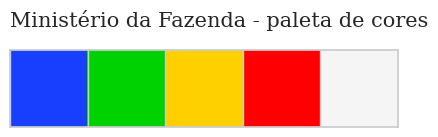

In [74]:
# Definindo a paleta de cores
Paleta = ['#183FFE', '#00D100', '#FFD000','#FE0002', '#f5f5f5']
sns.palplot( Paleta )
plt.title('Ministério da Fazenda - paleta de cores', loc='left',fontfamily='serif',fontsize=15, y=1.2);

In [75]:
Anl_Emprestimo = Base_Concesao.groupby( by='Ano' ).agg( Sum =('Valor', 'sum') ).tail(8) / 10 ** 9
Anl_Emprestimo

,Sum
Ano,
2017,251.32
2018,19.60
2019,13.25
2020,77.14
2021,9.06
2022,14.55
2023,17.74
2024,4.22


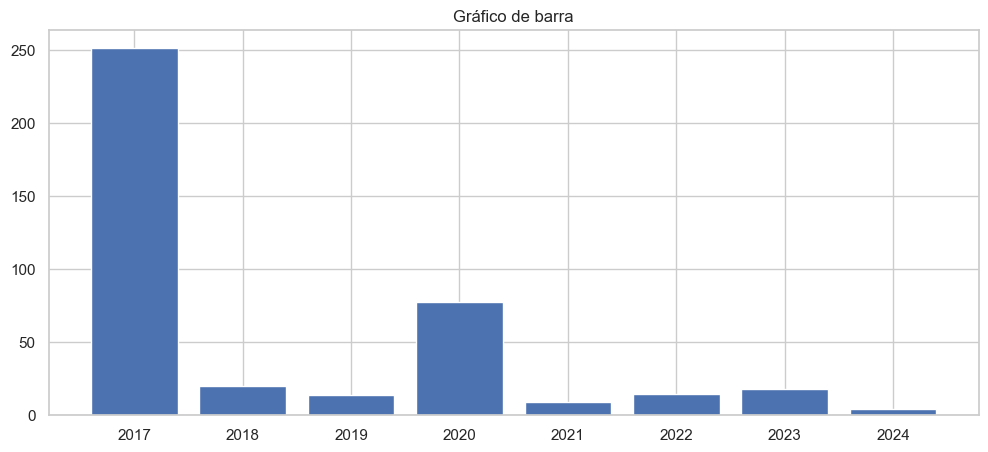

In [76]:
plt.figure( figsize=(12, 5) )
plt.title('Gráfico de barra')
plt.bar( Anl_Emprestimo.index, Anl_Emprestimo.Sum );

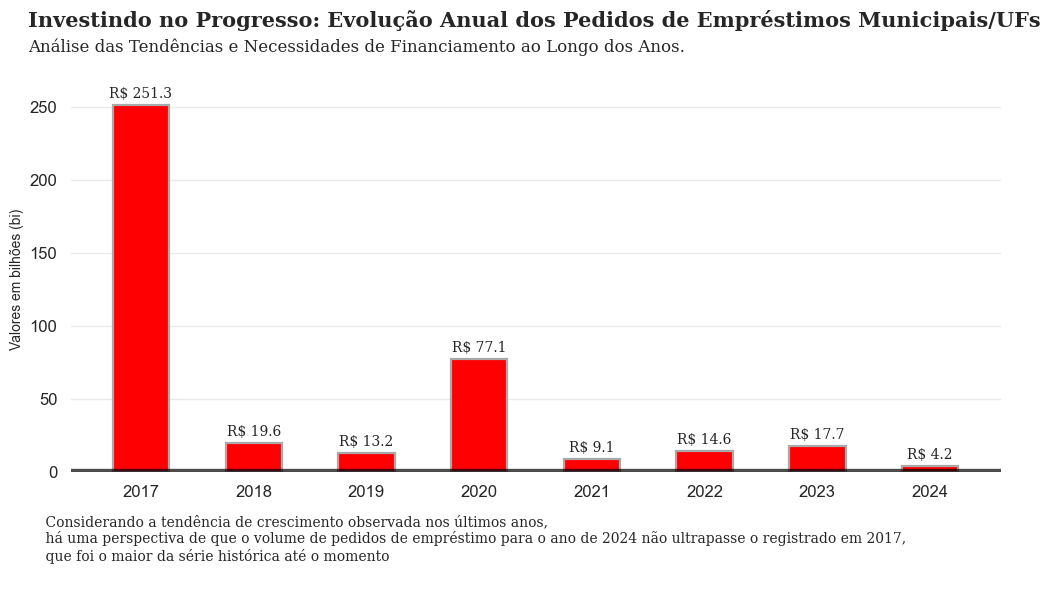

In [77]:
# Tamanho da figura
fig, ax = plt.subplots(figsize=(12, 5))

# Título e subtítulo
fig.text(0.09, 1, 'Investindo no Progresso: Evolução Anual dos Pedidos de Empréstimos Municipais/UFs', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Análise das Tendências e Necessidades de Financiamento ao Longo dos Anos.', fontsize=12, fontweight='light', fontfamily='serif');

# Gráfico de barras
bars = ax.bar(
    Anl_Emprestimo.index, Anl_Emprestimo.Sum,
    width=0.5, edgecolor='darkgray', linewidth=1.6, color=Paleta[3]
)

# Remover todas as spines (bordas)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Linha horizontal no eixo y=0
ax.axhline( y=0, color='black', linewidth=5.3, alpha=0.7)

# Configurar grid apenas no eixo y
ax.grid(axis='y', linestyle='-', alpha=0.4)
ax.grid(axis='x', alpha=0)

# Adicionar rótulo ao eixo y
ax.set_ylabel('Valores em bilhões (bi)', size=10)

# Configurar o tamanho das marcas dos eixos
ax.tick_params(axis='both', which='major', labelsize=12)

# Adicionar os valores em cima das barras
# Iterando sobre cada barra do gráfico
for bar in bars:

    # Obtendo a altura da barra atual
    height = bar.get_height()

    # Adicionando uma anotação (valor da barra) no topo de cada barra
    ax.annotate(
        # Formato do texto: 'R$' seguido do valor da barra com separadores de milhares e uma casa decimal
        'R$ {:,.1f}'.format(height),
        # Posição da anotação: centro da barra
        xy=(bar.get_x() + bar.get_width() / 2, height),
        # Deslocamento vertical e horizontal da anotação
        xytext=(0, 3),
        # Especificando o sistema de coordenadas do deslocamento da anotação
        textcoords="offset points",
        # Alinhamento horizontal e vertical do texto
        ha='center', va='bottom',
        # Tamanho da fonte do texto
        fontsize=10,
        # Peso da fonte (leve)
        fontweight='light',
        # Família da fonte (serif)
        fontfamily='serif'
    )

# insiths
fig.text(
    0.09, -0.1,
    '''
    Considerando a tendência de crescimento observada nos últimos anos,
    há uma perspectiva de que o volume de pedidos de empréstimo para o ano de 2024 não ultrapasse o registrado em 2017,
    que foi o maior da série histórica até o momento
    ''',
    fontsize=10, fontweight='light', fontfamily='serif'
)

plt.savefig('Analise-Anual.png', dpi=500, bbox_inches='tight');

In [78]:
# Volta para a base de CREDITO -- TIRa da Conecesão
Anl_Moeda_UF = Base_Credito.groupby( by=['Região', 'Moeda'] ).agg( Valor = ('Valor', 'sum') ).reset_index()

# DF Vazio
Coluna = pd.DataFrame()

# Loop para calcular os %
for Loop in Anl_Moeda_UF.Região.unique():
  Total = Anl_Moeda_UF[ Anl_Moeda_UF.Região == Loop ].Valor.sum()
  Fracao = Anl_Moeda_UF[ Anl_Moeda_UF.Região == Loop ].Valor / Total
  Coluna = pd.concat([Coluna, Fracao.reset_index()])

Anl_Moeda_UF['%'] = Coluna.Valor.values
Anl_Moeda_UF.head()

,Região,Moeda,Valor,%
0,Centro-Oeste,Dólar dos EUA,"5,194,722,117.27",0.07
1,Centro-Oeste,Euro,"184,000,000.00",0.00
2,Centro-Oeste,Iene,"1,439,500,000.00",0.02
3,Centro-Oeste,Real,"70,365,830,267.57",0.91
4,Nordeste,Direito Especial - SDR,"66,656,104.00",0.00


In [79]:
Tab_Cruzada = Anl_Moeda_UF.pivot_table( index='Região', columns='Moeda', values='%' )
Tab_Cruzada.drop( columns='Direito Especial - SDR', inplace=True )
Tab_Cruzada.columns = ['Dólar', 'Euro', 'Iene', 'Real']
Tab_Cruzada.head()

,Dólar,Euro,Iene,Real
Região,,,,
Centro-Oeste,0.07,0.00,0.02,0.91
Nordeste,0.08,0.00,0.37,0.54
Norte,0.07,0.00,0.18,0.75
Sudeste,0.05,0.00,0.18,0.77
Sul,0.05,0.00,0.15,0.80


*Por quê pedir empréstimos de moedas estrangeiras?*
1. **Diversificação de fontes de financiamento**

   Ao emitir dívida em diferentes moedas, como o iene, a União consegue diversificar suas fontes de financiamento. Isso ajuda a reduzir a dependência de um único mercado ou moeda, como o dólar ou o euro, permitindo melhores condições de negociação e acesso a novos investidores.

2. **Acesso a melhores condições de crédito**

   O Japão, historicamente, tem oferecido taxas de juros muito baixas em comparação com outros mercados. Os empréstimos em iene podem ser atrativos por oferecerem custos de financiamento mais baixos. Isso significa que o custo de tomar empréstimos em iene pode ser mais barato para a União em comparação com outras moedas, como o dólar.

3. **Atração de investidores asiáticos**

   Emitir dívida em iene pode atrair investidores do Japão e de outras regiões da Ásia, que podem preferir investir em títulos denominados em sua própria moeda. Essa estratégia permite à União acessar mercados de capitais diferentes e obter maior liquidez.

4. **Benefícios cambiais**

   Dependendo da situação econômica global e das taxas de câmbio, a União pode se beneficiar da desvalorização do iene em relação ao real, dólar ou outras moedas. Isso pode reduzir o custo real de pagar o empréstimo, já que a dívida em iene seria convertida em uma moeda que está enfraquecendo, tornando os pagamentos futuros mais baratos.

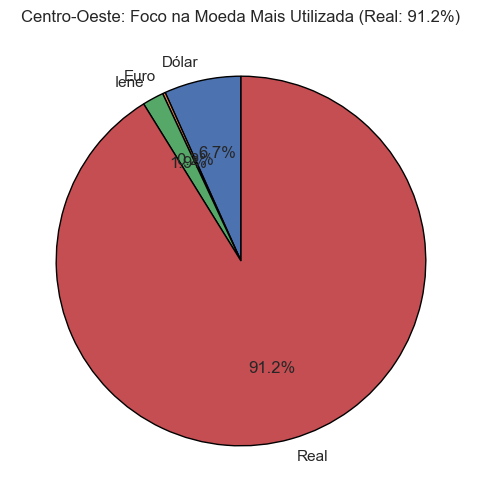

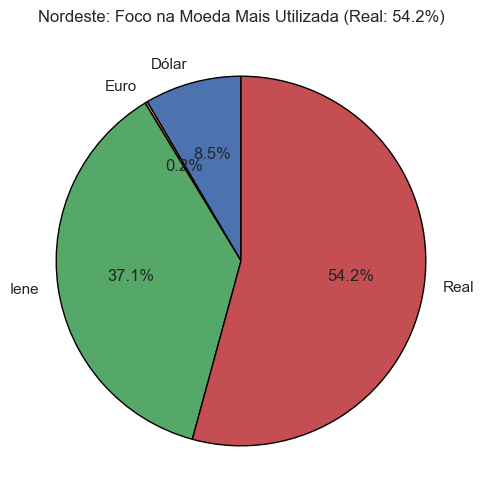

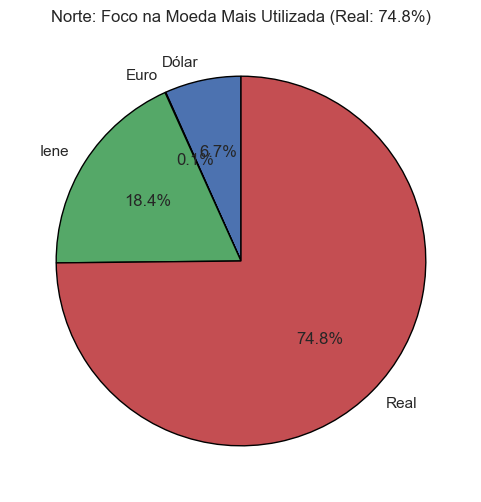

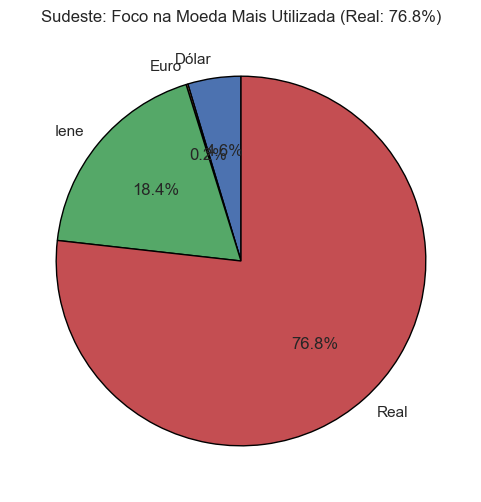

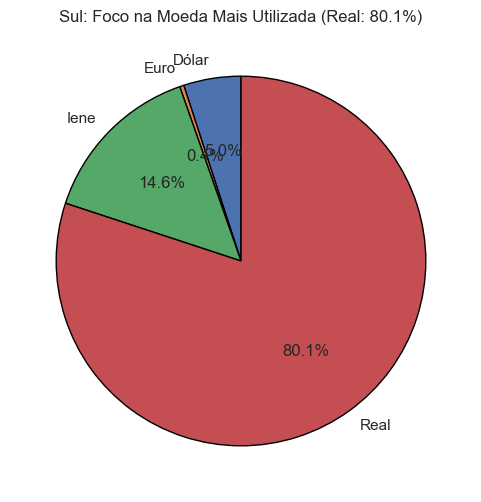

In [80]:
# Função para plotar gráfico de pizza para cada região
def plot_pizza_por_regiao(df):
    for regiao in df.index:
        # Extraindo os dados da região
        dados_regiao = df.loc[regiao]
        
        # Identificando a moeda mais utilizada
        moeda_mais_utilizada = dados_regiao.idxmax()
        percentual_mais_utilizada = dados_regiao.max()
        
        # Criando o gráfico de pizza
        plt.figure(figsize=(6, 6))
        plt.pie(dados_regiao, labels=dados_regiao.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
        plt.title(f'{regiao}: Foco na Moeda Mais Utilizada ({moeda_mais_utilizada}: {percentual_mais_utilizada*100:.1f}%)')
        plt.show()

# Gerando gráficos de pizza por região
plot_pizza_por_regiao(Tab_Cruzada)

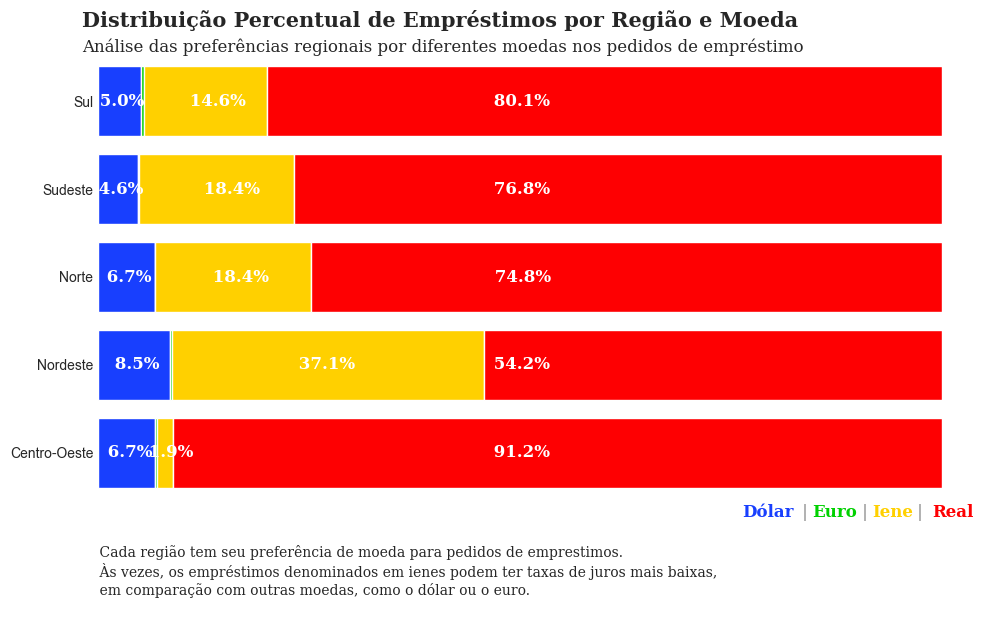

In [81]:
# Criando o gráfico de barras horizontais empilhadas
fig, ax = plt.subplots( figsize=(10, 5) )

# Acumulando valores para empilhar
bottom = np.zeros( len(Tab_Cruzada) )

# Adicionando cada coluna ao gráfico
for i, column in enumerate(Tab_Cruzada.columns):
    ax.barh( Tab_Cruzada.index, Tab_Cruzada[column], left=bottom, color=Paleta[i], label=column, height=0.8 )
    bottom += Tab_Cruzada[column].fillna(0)

# Adicionando título e rótulos
fig.text(0.09, 1, 'Distribuição Percentual de Empréstimos por Região e Moeda', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Análise das preferências regionais por diferentes moedas nos pedidos de empréstimo', fontsize=12, fontweight='light', fontfamily='serif')

# Remover todas as spines (bordas)
for Loop in ['top', 'left', 'right', 'bottom']:
    ax.spines[Loop].set_visible(False)

# Configurar grid apenas no eixo y
ax.grid(axis='y', alpha=0)
ax.grid(axis='x', alpha=0)

ax.set_xlim(0, 1)
ax.set_xticks([])

ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis=u'both', which=u'both',length=0)

# Legenda criativa
fig.text(0.75, 0.02, 'Dólar', fontweight='bold', fontfamily='serif', fontsize=12, color=Paleta[0] )
fig.text(0.81, 0.02, '|', fontweight='bold', fontfamily='serif', fontsize=12, color='darkgray')
fig.text(0.82, 0.02, 'Euro', fontweight='bold', fontfamily='serif', fontsize=12, color=Paleta[1] )
fig.text(0.87, 0.02, '|', fontweight='bold', fontfamily='serif', fontsize=12, color='darkgray')
fig.text(0.88, 0.02, 'Iene', fontweight='bold', fontfamily='serif', fontsize=12, color=Paleta[2] )
fig.text(0.925, 0.02, '|', fontweight='bold', fontfamily='serif', fontsize=12, color='darkgray')
fig.text(0.94, 0.02, 'Real', fontweight='bold', fontfamily='serif', fontsize=12, color=Paleta[3] )

# Numeros DOLAR
for i in Tab_Cruzada.index:
    ax.annotate(
        f" {round(Tab_Cruzada['Dólar'][i]*100,1)}%",
        xy=(Tab_Cruzada['Dólar'][i]/2, i),
        va = 'center', ha='center',
        fontsize=12, fontweight='bold', fontfamily='serif',
        color='white' )

# Numeros IENE
for i in Tab_Cruzada.index:
    ax.annotate(
        f" {round(Tab_Cruzada['Iene'][i]*100,1)}%",
        xy=( Tab_Cruzada['Dólar'][i]/2 + Tab_Cruzada['Iene'][i]/2 + 0.04, i),
        va = 'center', ha='center',
        fontsize=12, fontweight='bold', fontfamily='serif',
        color='white' )

# Numeros REAL
for i in Tab_Cruzada.index:
    ax.annotate(
        f" {round(Tab_Cruzada['Real'][i]*100,1)}%",
        xy=(Tab_Cruzada['Dólar'][i]/2++Tab_Cruzada['Iene'][i]/2+Tab_Cruzada['Real'][i]/2, i),
        va = 'center', ha='center',
        fontsize=12, fontweight='bold', fontfamily='serif',
        color='white' )

# Ajustando layout
plt.tight_layout()

# insiths
fig.text(
    0.09, -0.2,
    '''
    Cada região tem seu preferência de moeda para pedidos de emprestimos.
    Às vezes, os empréstimos denominados em ienes podem ter taxas de juros mais baixas,
    em comparação com outras moedas, como o dólar ou o euro.

    ''',
    fontsize=10, fontweight='light', fontfamily='serif'
);

#fig.subplots_adjust(left=0.1)
fig.subplots_adjust(right=0.95)

plt.savefig('Analise-percentual.png', dpi=400, bbox_inches='tight');

### Finalidades

In [82]:
Anl_TOP_Finalidades = Base_Credito[ Base_Credito.Ano >= 2017 ].Finalidade.value_counts( normalize=True ).head(10)
for Loop in Anl_TOP_Finalidades.index:
  print( Loop )

Infraestrutura
Aquisição de máquinas, equipamentos e veículos
Multissetorial
Aquisição de terrenos, imóveis e/ou construção de instalações
Pró-Transporte
Aporte de capital
Saneamento básico
Desenvolvimento sustentável
PMAT
PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias


In [83]:
Anl_TOP_Finalidades.index = ['Infraestrutura', 'Aquisição equipamentos', 'Multissetorial', 'Aquisição de terrenos',
'Pró-Transporte', 'Aporte de capital', 'Saneamento básico', 'Desenvolvimento sustentável', 'PMAT', 'PAC 2']

Anl_TOP_Finalidades.sort_values( inplace=True )

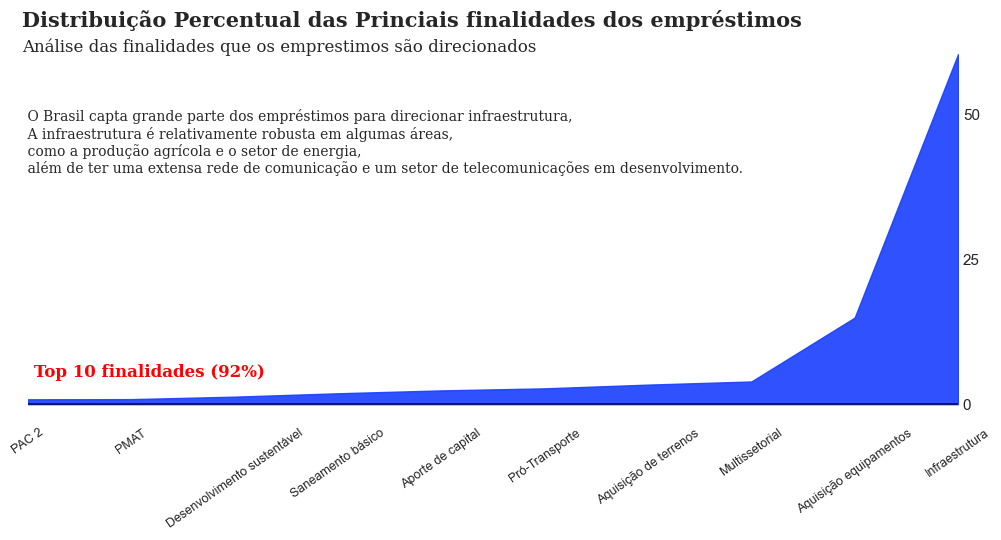

In [84]:
fig, ax = plt.subplots( figsize=(12, 5) )

# Adicionando título e rótulos
fig.text(0.12, 0.90, 'Distribuição Percentual das Princiais finalidades dos empréstimos', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.12, 0.85, 'Análise das finalidades que os emprestimos são direcionados', fontsize=12, fontweight='light', fontfamily='serif')

ax.fill_between( Anl_TOP_Finalidades.index, 0, Anl_TOP_Finalidades * 100, color=Paleta[0], alpha=0.9)
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

fig.text(0.13, 0.2, 'Top 10 finalidades (92%)', fontweight="bold", fontfamily='serif', fontsize=12, color=Paleta[3])

ax.yaxis.tick_right()

ax.grid(False)
ax.set_xlim([0, 9])
plt.xticks(rotation=35, fontsize=9 )
plt.yticks( np.arange(0, 70, 25) )

ax.tick_params(axis=u'both', which=u'both',length=0);

# insiths
fig.text(
    0.11, 0.51,
    '''
    O Brasil capta grande parte dos empréstimos para direcionar infraestrutura,
    A infraestrutura é relativamente robusta em algumas áreas,
    como a produção agrícola e o setor de energia,
    além de ter uma extensa rede de comunicação e um setor de telecomunicações em desenvolvimento.


    ''',
    fontsize=10, fontweight='light', fontfamily='serif'
);
plt.savefig('Analise-finalidades.png', dpi=400, bbox_inches='tight');

In [85]:
# Selecionar as finalidades
Lista_Finalidade = list( Base_Credito.Finalidade.value_counts( normalize=True ).cumsum().head( 10 ).index.values )


Anl_Regiao_Finalidade = Base_Credito.loc[ Base_Credito.Finalidade.isin( Lista_Finalidade ) ].groupby(
    by=['Região', 'Finalidade'] ).agg(
        Sum = ('Valor', 'sum') ).reset_index().pivot_table(
            index='Região', columns='Finalidade', values='Sum'
)

Anl_Regiao_Finalidade

Finalidade,"Aquisição de máquinas, equipamentos e veículos","Aquisição de terrenos, imóveis e/ou construção de instalações",Caminho da Escola,Caminho da Escola 2,Infraestrutura,Multissetorial,PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias,PMAT,Provias,Saneamento básico
Região,,,,,,,,,,
Centro-Oeste,"2,100,032,663.02","53,717,532.40","35,017,950.00","22,647,600.00","21,563,103,570.45","615,406,138.00","2,717,872,117.30","176,218,631.10","110,320,116.93","395,268,821.28"
Nordeste,"586,878,563.23","342,094,063.82","57,952,907.01","71,670,045.00","54,059,177,086.49","10,718,789,393.25","1,794,088,385.71","478,380,713.71","120,821,143.01","3,601,116,507.58"
Norte,"91,733,777.20","18,582,263.45","22,959,214.00","13,327,142.00","43,313,656,121.66","3,582,002,278.00","1,387,051,493.12","256,845,325.70","53,886,920.00","1,927,488,987.99"
Sudeste,"10,305,807,290.86","1,010,800,242.38","98,043,985.57","74,229,235.00","144,255,809,504.75","12,193,746,851.38","5,885,148,985.49","2,445,433,222.88","561,807,562.51","3,582,864,990.31"
Sul,"1,888,482,882.44","749,665,469.17","112,844,135.00","55,028,931.00","40,598,761,640.83","4,692,682,726.09","4,475,234,346.23","738,247,290.18","717,284,054.00","933,219,792.66"


In [86]:
Anl_Regiao_Finalidade.rename(
    columns={
      'Aquisição de máquinas, equipamentos e veículos' :   'Aq. de equipamentos',
      'Aquisição de terrenos, imóveis e/ou construção de instalações' : 'Aq. imóveis',
      'Caminho da Escola'      : 'Caminho da Escola',
      'Caminho da Escola 2'     :'Caminho da Escola 2',
      'Infraestrutura'    : 'Infraestrutura',
      'Multissetorial'   : 'Multissetorial',
      'PAC 2 - Pró-Transporte - Pavimentação e Qualificação de Vias'  : 'PAC 2',
      'PMAT' : 'PMAT',
      'Provias': 'Provias',
      'Saneamento básico': 'Saneamento básico'
    }, inplace=True
)

Anl_Regiao_Finalidade

Finalidade,Aq. de equipamentos,Aq. imóveis,Caminho da Escola,Caminho da Escola 2,Infraestrutura,Multissetorial,PAC 2,PMAT,Provias,Saneamento básico
Região,,,,,,,,,,
Centro-Oeste,"2,100,032,663.02","53,717,532.40","35,017,950.00","22,647,600.00","21,563,103,570.45","615,406,138.00","2,717,872,117.30","176,218,631.10","110,320,116.93","395,268,821.28"
Nordeste,"586,878,563.23","342,094,063.82","57,952,907.01","71,670,045.00","54,059,177,086.49","10,718,789,393.25","1,794,088,385.71","478,380,713.71","120,821,143.01","3,601,116,507.58"
Norte,"91,733,777.20","18,582,263.45","22,959,214.00","13,327,142.00","43,313,656,121.66","3,582,002,278.00","1,387,051,493.12","256,845,325.70","53,886,920.00","1,927,488,987.99"
Sudeste,"10,305,807,290.86","1,010,800,242.38","98,043,985.57","74,229,235.00","144,255,809,504.75","12,193,746,851.38","5,885,148,985.49","2,445,433,222.88","561,807,562.51","3,582,864,990.31"
Sul,"1,888,482,882.44","749,665,469.17","112,844,135.00","55,028,931.00","40,598,761,640.83","4,692,682,726.09","4,475,234,346.23","738,247,290.18","717,284,054.00","933,219,792.66"


In [87]:
# Reescrever a coluna do DF
for Loop in Anl_Regiao_Finalidade.columns:
  #print( Anl_Regiao_Finalidade[Loop] / 10 ** 9 )
  Anl_Regiao_Finalidade[Loop] = Anl_Regiao_Finalidade[Loop] / 10 ** 9
Anl_Regiao_Finalidade

Finalidade,Aq. de equipamentos,Aq. imóveis,Caminho da Escola,Caminho da Escola 2,Infraestrutura,Multissetorial,PAC 2,PMAT,Provias,Saneamento básico
Região,,,,,,,,,,
Centro-Oeste,2.10,0.05,0.04,0.02,21.56,0.62,2.72,0.18,0.11,0.40
Nordeste,0.59,0.34,0.06,0.07,54.06,10.72,1.79,0.48,0.12,3.60
Norte,0.09,0.02,0.02,0.01,43.31,3.58,1.39,0.26,0.05,1.93
Sudeste,10.31,1.01,0.10,0.07,144.26,12.19,5.89,2.45,0.56,3.58
Sul,1.89,0.75,0.11,0.06,40.60,4.69,4.48,0.74,0.72,0.93


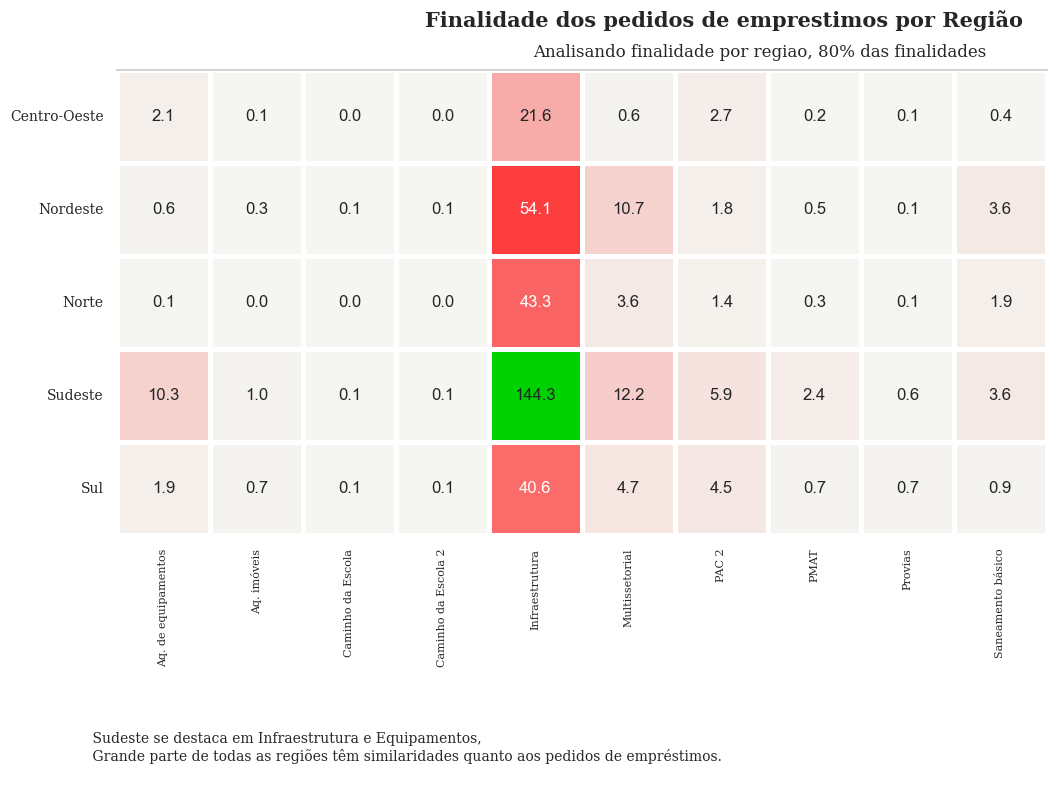

In [88]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f1', '#FE0002','#00D100'] )

fig, ax = plt.subplots( figsize=(12, 12) )

sns.heatmap(
    Anl_Regiao_Finalidade,
    linewidths=2.5,
    cmap=cmap,
    annot=True,
    fmt='.1f',
    square=True,
    cbar=False,
    annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

ax.set_ylabel('')
ax.set_xlabel('')

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=8)

fig.text( 0.88, .725, 'Finalidade dos pedidos de emprestimos por Região', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')
fig.text( 0.85, 0.7, 'Analisando finalidade por regiao, 80% das finalidades',ha='right', fontsize=12,fontfamily='serif')

# insiths
fig.text(
    0.09, 0.1,
    '''
    Sudeste se destaca em Infraestrutura e Equipamentos,
    Grande parte de todas as regiões têm similaridades quanto aos pedidos de empréstimos.
    ''',
    fontsize=10, fontweight='light', fontfamily='serif'
);

plt.savefig('Analise-finalidades-regiao.png', dpi=400, bbox_inches='tight');